Loose inspiration:
https://journals.aps.org/prb/pdf/10.1103/PhysRevB.102.174206

Expectation: According to the Harris Criterion the critical behavior shouldn't change, when adding uncorrelated (spatially) defects to an Ising Hamiltonian.

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
shape = (10, 10, 10)
spins = np.array([-1, 1])[np.random.randint(0, 2, size=shape)]
prob = .1
defects = np.random.choice([0, 1], size=shape, p = [prob, 1-prob])

GOTCHA: $\mathrm{defects} == 1$ where there is a particle on the lattice and $0$ where there isn't.

In [4]:
def ising_defect(spins, defects, J):
    S = spins * defects
    E = np.sum(
        S * ( np.roll(S, 1, axis=0)
            + np.roll(S, 1, axis=1)
            + np.roll(S, 1, axis=2) )
    )
    E *= -J
    return E

In [5]:
ising_defect(spins, defects, 1)

-35

In [6]:
def show(spins, defects, cut=0):
    plt.imshow( (spins * defects)[:, :, cut])
    plt.colorbar()

In [7]:
plt.viridis

<function matplotlib.pyplot.viridis()>

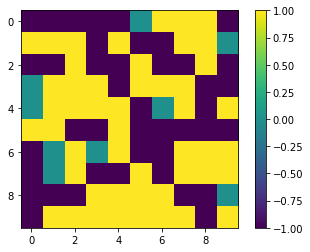

In [8]:
show(spins, defects)

In [9]:
np.random.randint(shape)

array([5, 8, 6])

In [10]:
x, y, z = np.where(defects==1)

In [11]:
x.shape, y.shape, z.shape

((894,), (894,), (894,))

In [12]:
kBT = 10

In [13]:
shape = (10, 10, 10)
spins = np.array([-1, 1])[np.random.randint(0, 2, size=shape)]
prob = .1
defects = np.random.choice([0, 1], size=shape, p = [prob, 1-prob])

In [14]:
steps = 10000
J = 1
e = ising_defect(spins, defects, J=J)

E = []
accepted_indices = []
for i in range(steps):
    I = np.random.randint(x.shape[0])
    xi = x[I]
    yi = y[I]
    zi = z[I]
        
    spins[xi, yi, zi] *= -1
    
    e_new = ising_defect(spins, defects, J=J)
    if np.exp((e - e_new)/kBT) > np.random.rand():
        e = e_new
        E.append(e)
        accepted_indices.append(i)
    else:
        spins[xi, yi, zi] *= -1
accepted = len(E)

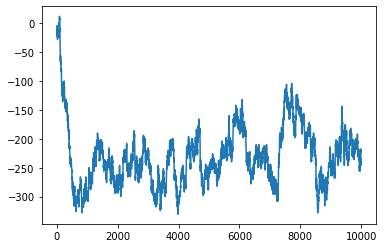

In [15]:
plt.plot(accepted_indices, E)

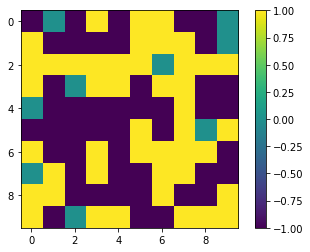

In [16]:
show(spins, defects)

In [19]:
def magnetization(spins, defects):
    return (spins * defects).sum() / defects.sum()

In [82]:
!pip install numba

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.1 MB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 107 kB 3.4 MB/s eta 0:00:01
Using legacy 'setup.py install' for numba, since package 'wheel' is not installed.
Using legacy 'setup.py install' for llvmlite, since package 'wheel' is not installed.
    Running setup.py install for llvmlite ... error
    ERROR: Command errored out with exit status 1:
     command: /usr/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-t84l_6lg/llvmlite/setup.py'"'"'; __file__='"'"'/tmp/pip-install-t84l_6lg/llvmlite/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-utn4mkta/install-record.txt --single-version-externally-managed --user --prefix= --compile --install-headers /home/po

In [83]:
import numba

ModuleNotFoundError: No module named 'numba'

In [81]:
@numba.jit
def mc(steps, spins, defects, kBT, J=1):
    e = ising_defect(spins, defects, J=J)

    E = np.zero(steps)
    M = np.zero(steps)
    accepted_indices = np.zero(steps)
    accepted = 0
    i = 0
    while accepted < steps:
        I = np.random.randint(x.shape[0])
        xi = x[I]
        yi = y[I]
        zi = z[I]

        spins[xi, yi, zi] *= -1

        e_new = ising_defect(spins, defects, J=J)
        if np.exp((e - e_new)/kBT) > np.random.rand():
            e = e_new
            E[accepted] = e
            M[accepted] = magnetization(spins, defects)
            accepted_indices[accepted] = i
            accepted += 1
        else:
            spins[xi, yi, zi] *= -1
        i += 1
    return accepted_indices, E, M, spins

NameError: name 'numba' is not defined

In [18]:
mc(10, spins, defects, 1);

In [75]:
shape = (10, 10, 10)
type_prob = .25
spins = np.random.choice([-1, 1], size=shape, p = [type_prob, 1-type_prob])
defect_prob = .0
defects = np.random.choice([0, 1], size=shape,
                           p = [defect_prob, 1-defect_prob])

In [76]:
(spins==1).sum()

777

In [77]:
defects.sum()

1000

KeyboardInterrupt: 

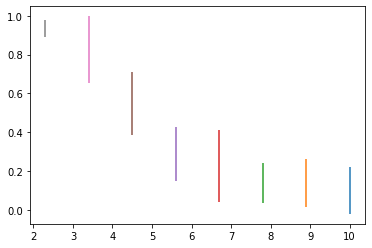

In [79]:
M = []
Ts = np.linspace(.1, 10, 10)[::-1]
for T in Ts:
    idx, E, step_M, step_spins = mc(10000, spins.copy(), defects, kBT = T)
    n = len(E)
#     plt.plot(idx, E, label = T)
    plt.errorbar(T, step_M[-n//2::10].mean(), yerr = 5*step_M[-n//2::10].std(), label=T)
plt.legend()

In [85]:
1/np.sqrt(10000)

0.01

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

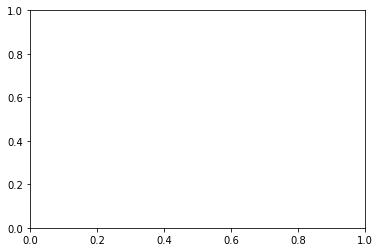

In [66]:
plt.plot(Ts, M, 'o')

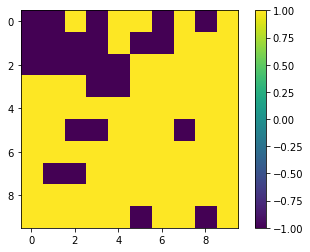

In [67]:
show(step_spins, defects, cut=3)

In [50]:
shape = (10, 10, 10)
type_prob = .25
spins = np.random.choice([-1, 1], size=shape, p = [type_prob, 1-type_prob])
defect_prob = .1
defects = np.random.choice([0, 1], size=shape,
                           p = [defect_prob, 1-defect_prob])

In [34]:
(spins==1).sum()

746

In [35]:
defects.sum()

1000

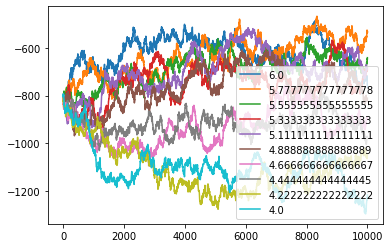

In [51]:
M_d = []
for T in Ts:
    idx, E, step_spins = mc(10000, spins.copy(), defects, kBT = T)
    plt.plot(idx, E, label = T)
    M_d.append(magnetization(step_spins, defects))
plt.legend()

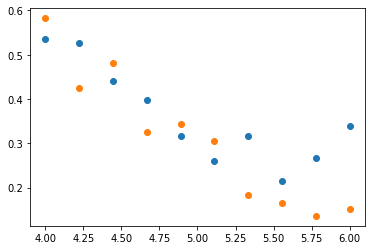

In [54]:
plt.plot(Ts, M_d, 'o')
plt.plot(Ts, M, 'o')

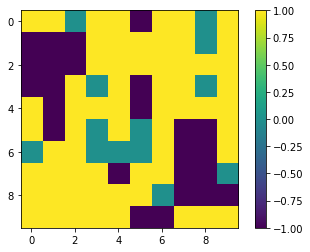

In [53]:
show(step_spins, defects, cut=3)